 ## MOVIE RECOMMENDER SYSTEM

#### Objective:
- 1.Create a popularity-based recommender system at a genre level. The user will input a genre (g), minimum rating threshold (t) for a movie,and no. of recommendations(N) for which it should be recommended top N movies which are most popular within that genre (g) ordered by ratings in descending order where each movie has at least (t) reviews.
- 2.Create a content-based recommender system that recommends top N movies based on similar movie(m) genres.
- 3.Create a collaborative based recommender system which recommends top N movies based on “K” similar users for a target user “u”.
#### Data Description:
The  data  consists  of  105339  ratings  applied  over  10329  movies.  The  average  rating  and minimum and maximum rating are 0.5 and 5 respectively. There are 668 users who have given their ratings for 149532 movies.There are two data files which are provided:
- Movies.csv
     - movie Id:ID assigned to a movie
     - title:Title of a movie
     - genres:pipe-separated list of movie genres.
- Ratings.csv
     - user Id:ID assigned to a user
     - movie Id:ID assigned to a movie
     - rating:rating by a user to a movie
     - Timestamp:time at which the rating was provided
#### Steps and Tasks
- Import libraries and load dataset
- Exploratory Data Analysis including:
     - Understanding of distribution of the features available
     - Finding unique users and movies
     - Average rating and Total movies at genre level.
     - Unique genres considered.
- Design the 3 different types of recommendation modules as mentioned in the objectives.
- Additional/Optional: Create a GUI interface using Python libraries(ipywidgetsetc.) to play around with there commendation modules.


## Introduction :


A movie recommendation system is a system whose objective is to predict and compile a list of movies that a user is likely to watch. Recommendation systems have gained much popularity in recent years and have been developed and implemented for various commercial use cases.

For example,
- Netflix uses recommendation systems to recommend movies or television programs for individual users
- Amazon uses recommendation systems to predict and display a list of products that the customer is likely to buy
- Spotify uses music recommendation systems to provide new songs for its listeners

Recommendation systems have a strong potentional to be used in a variery of other areas as well, however they play a major role in the e-commerce and media businesses, as they can directly impact the revenue and user engagement.

- There are broadly 3 types of recommendation systems:

-  1.Popularity Based: This is a basic system in which movies/shows which are rated high will be recommended to all the users in a certain demographic region. Eg: Netflix Top Trending will show top 10 movies trending in that particular country to every user.
-  2.Content Based: The general idea is that if a user liked an item with certain properites then he/she are more likely to like similar items. Eg: Movies are recommended based on they Cast, Story, Genre, Plot, Director and many more fields.
-  3.Collaborative Filtering: This is a more advanced system in which the algorithm tries to find similar users/articles and then recommends items based on this similarity. Eg: If one person likes movies A, B, and C and another person likes movies A, B, and D, it is likely that the first person will buy item D and the other person will buy item C, since they share many similarities with each other.

       - User-based Collaborative Filtering (UBCF): This approach recommends items to a user based on the preferences and behaviors of users who are similar to them. If user A and user B have similar tastes and preferences, and user A likes an item that user B has not yet seen, the system may recommend that item to user B.
       - Item-based Collaborative Filtering (IBCF): This method recommends items that are similar to those the user has shown interest in. It identifies relationships between items based on user preferences and recommends items that are similar to the ones the user has liked or interacted with.

- Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

- Loading the datasets

In [2]:
movies_df=pd.read_csv('movies.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings_df=pd.read_csv('ratings.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [4]:
movies_df.shape , ratings_df.shape

((10329, 3), (105339, 4))

In [5]:
df=pd.merge(movies_df,ratings_df,on='movieId')
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286


- Exploratory Data Analysis

In [6]:
df.shape

(105339, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    105339 non-null  int64  
 1   title      105339 non-null  object 
 2   genres     105339 non-null  object 
 3   userId     105339 non-null  int64  
 4   rating     105339 non-null  float64
 5   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 4.8+ MB


In [8]:
df.isnull().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [9]:
df.nunique()

movieId      10325
title        10323
genres         938
userId         668
rating          10
timestamp    84686
dtype: int64

In [10]:
print(f'Unique number of users in the dataset: {df.userId.nunique()}')
print(f'Unique number of movies in the dataset: {df.title.nunique()}')

Unique number of users in the dataset: 668
Unique number of movies in the dataset: 10323


## 1. Popularity Based Recommeder system

In [11]:
#Calculate mean rating of all movies 
average_movies_ratings = df.groupby('title')['rating'].mean().sort_values(ascending=False)
average_movies_ratings=average_movies_ratings.to_frame()
average_movies_ratings.columns=['Average rating']
average_movies_ratings.head()

,Average rating
title,
"Saddest Music in the World, The (2003)",5.0
Interstate 60 (2002),5.0
"Gunfighter, The (1950)",5.0
Heima (2007),5.0
Limelight (1952),5.0


#### These are the top 5 movies that can be naviely suggested to the new users, Recommendations based on top average ratings.


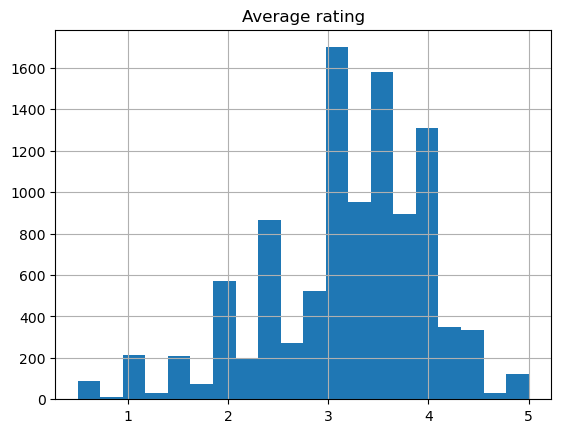

In [12]:
average_movies_ratings.hist(bins=20)
plt.show()

##### Maximum movies have average rating in the range 3 to 4.

In [13]:
#Calculate count rating of all movies 
count_ratings = df.groupby('title')['rating'].count().sort_values(ascending=False)
count_ratings=pd.DataFrame(count_ratings)
count_ratings.columns=['Number of Users watched']
count_ratings.head() 

,Number of Users watched
title,
Pulp Fiction (1994),325
Forrest Gump (1994),311
"Shawshank Redemption, The (1994)",308
Jurassic Park (1993),294
"Silence of the Lambs, The (1991)",290


#### These are the most popular movies which can be recommended to a new user. Recommendations based on Popularity.

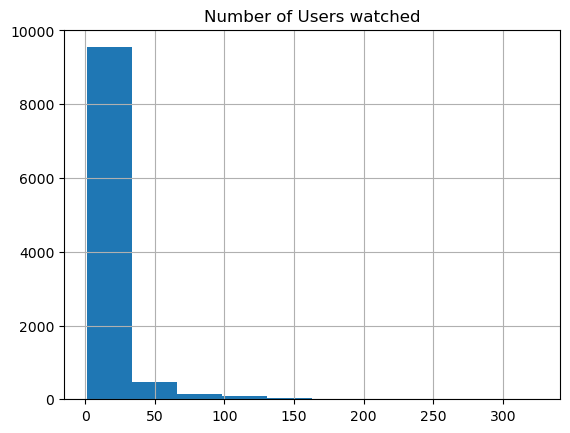

In [14]:
count_ratings.hist()
plt.show()

#### Maximum movies have been viewed in the range 0 to 40 views.

In [15]:
highly_rated_popular_movies = df.groupby('title')['rating'].agg(['mean', 'count']).round(2).rename(columns={"count": "Number of Users watched", "mean": "Average rating"}).sort_values('Number of Users watched', ascending = False)
highly_rated_popular_movies.head(10)

,Average rating,Number of Users watched
title,,
Pulp Fiction (1994),4.16,325
Forrest Gump (1994),4.14,311
"Shawshank Redemption, The (1994)",4.45,308
Jurassic Park (1993),3.66,294
"Silence of the Lambs, The (1991)",4.19,290
Star Wars: Episode IV - A New Hope (1977),4.19,273
"Matrix, The (1999)",4.26,261
Terminator 2: Judgment Day (1991),3.96,253
Braveheart (1995),4.11,248


##### Our result shows that:
- 'Pulp Fiction (1994)'
- 'Forrest Gump (1994)'
- 'Shawshank Redemption, The (1994)'
- 'Jurassic Park (1993)'
- 'Silence of the Lambs, The (1991)' are the most rated movies.
- So,based on our method we could suggest them to the users.
Recommendations based on popularity and rating. These are top rated popular movies.

### Recommendations based on Movie Genre to a New User.

In [16]:
movies_df['genres']=movies_df['genres'].str.replace('|',',')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),"Adventure,Animation,Children,Comedy,Fantasy"
1,2,Jumanji (1995),"Adventure,Children,Fantasy"
2,3,Grumpier Old Men (1995),"Comedy,Romance"
3,4,Waiting to Exhale (1995),"Comedy,Drama,Romance"
4,5,Father of the Bride Part II (1995),Comedy


In [17]:
movies_df=pd.concat([movies_df, movies_df['genres'].str.get_dummies(sep=',')], axis=1)
movies_df.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),"Adventure,Animation,Children,Comedy,Fantasy",0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),"Adventure,Children,Fantasy",0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),"Comedy,Romance",0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),"Comedy,Drama,Romance",0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
list(movies_df.columns.values)

['movieId',
 'title',
 'genres',
 '(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [19]:
movie_genre_list=['(no genres listed)','Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir',
                  'Horror','IMAX','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']    

In [20]:
def recommend_genre(genres):
  x = genres
  print("  GENRE: ", x)
  print("    ")
  genre_based_movies = movies_df[['movieId','title',x]]
  genre_based_movies = genre_based_movies[genre_based_movies[x] == 1]
  merged_genre_movies = pd.merge(ratings_df, genre_based_movies, on='movieId')
  
  highly_rated_popular_movies = merged_genre_movies.groupby('title')['rating'].agg(['mean', 'count']).round(2).rename(columns={"count": "Number of Users watched", "mean": "Average rating"}).sort_values('Number of Users watched', ascending = False).head(N)
  
  viewer_limit = t

  s= highly_rated_popular_movies[highly_rated_popular_movies['Number of Users watched'] > viewer_limit].sort_values('Number of Users watched', ascending = False)
  
  print("These movies are the best to suggest to a new user within their requested genre as they are popular and well rated by the users who already watched them.")
  print("These have", viewer_limit ," viewers.")

  print("**Recommendations based popularity and rating. These are top rated popular movies**")
  print(s)

In [21]:
t=int(input('Enter Minimum rating threshold :'))
N=int(input('Enter Number of Recommendations:'))
print(recommend_genre('Comedy'))

Enter Minimum rating threshold : 150
Enter Number of Recommendations: 7


  GENRE:  Comedy
    
These movies are the best to suggest to a new user within their requested genre as they are popular and well rated by the users who already watched them.
These have 150  viewers.
**Recommendations based popularity and rating. These are top rated popular movies**
                           Average rating  Number of Users watched
title                                                             
Pulp Fiction (1994)                  4.16                      325
Forrest Gump (1994)                  4.14                      311
Toy Story (1995)                     3.91                      232
Back to the Future (1985)            3.94                      213
Fargo (1996)                         4.27                      201
Aladdin (1992)                       3.60                      191
True Lies (1994)                     3.58                      184
None


In [22]:
t=int(input('Enter Minimum rating threshold :'))
N=int(input('Enter Number of Recommendations:'))
print(recommend_genre('Romance'))

Enter Minimum rating threshold : 200
Enter Number of Recommendations: 5


  GENRE:  Romance
    
These movies are the best to suggest to a new user within their requested genre as they are popular and well rated by the users who already watched them.
These have 200  viewers.
**Recommendations based popularity and rating. These are top rated popular movies**
                        Average rating  Number of Users watched
title                                                          
Forrest Gump (1994)               4.14                      311
American Beauty (1999)            4.16                      216
None


## 2. Content Based Recommender System

In [23]:
# creating pivot table to create item by item collaborative filtering
movie_rating_pivot = pd.pivot_table(index='userId',columns='title',values='rating',data=df).fillna(0)
movie_rating_pivot.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let's find which movies to recommend to the users who have watched 'Pulp Fiction (1994)'. To do this we have to find correlation of 'Pulp Fiction (1994)' with other movies which have been rated in a similar way by the users.

In [24]:
## Find the correlation with other movies from movie_rating_pivot table

In [25]:
similar_to_pulp_fiction =  pd.DataFrame(movie_rating_pivot.corrwith(movie_rating_pivot['Pulp Fiction (1994)'])).reset_index().sort_values(by =0,ascending = False)
similar_to_pulp_fiction.head()

,title,0
7323,Pulp Fiction (1994),1.000000
8228,"Silence of the Lambs, The (1991)",0.506693
9658,"Usual Suspects, The (1995)",0.482148
8063,Seven (a.k.a. Se7en) (1995),0.476376
8136,"Shawshank Redemption, The (1994)",0.453247


These are the movies we can recommend to the user who has watched 'Pulp Fiction (1994)'.

In [26]:
def recomender(Movie_Title):
    user_rating = movie_rating_pivot[Movie_Title]
    similar_movie = pd.DataFrame(movie_rating_pivot.corrwith(user_rating)).reset_index().sort_values(by = 0,ascending = False)
    return similar_movie.head(N)

In [27]:
Movie_Title = input('Enter a Movie Title you like:')
N = int(input('Enter a Number of Movie Recommedation you like:'))
print(recomender(Movie_Title))

Enter a Movie Title you like: Jurassic Park (1993)
Enter a Number of Movie Recommedation you like: 10


                                  title         0
4934               Jurassic Park (1993)  1.000000
8488                       Speed (1994)  0.554932
8991  Terminator 2: Judgment Day (1991)  0.547722
9475                   True Lies (1994)  0.526494
3349                Forrest Gump (1994)  0.517095
3474               Fugitive, The (1993)  0.493990
7224                Pretty Woman (1990)  0.475958
840                       Batman (1989)  0.463789
3589                       Ghost (1990)  0.451132
5857                   Mask, The (1994)  0.436307


## 3. Collaborative Based Recommender System

### Training KNN model to build item-based collaborative Recommender System.

We need to transform (reshape in this case) the data in such a way that each row of the dataframe represents a movie and each column represents a different user. So we want the data to be [movies, users] array if movie is the subject where similar movies must be found and [users, movies] array for reverse.

To reshape the dataframe, we will pivot the dataframe to the wide format with movies as rows and users as columns. As we know that not all users watch all the movies, we can expect a lot of missing values. We will have to fill those missing observations with 0s since we are going to perform linear algebra operations (calculating distances between vectors).

Finally, we transform the values of the dataframe into a scipy sparse matrix for most efficient calculations.

This dataframe is then fed into a KNN model.

In [28]:
# pivot and create movie-user matrix
user_to_movie_df = pd.pivot_table(index='userId',columns='title',values='rating',data=df).fillna(0)
user_to_movie_df.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# transform matrix to scipy sparse matrix
user_to_movie_sparse_df = csr_matrix(user_to_movie_df.values)
user_to_movie_sparse_df

<668x10323 sparse matrix of type '<class 'numpy.float64'>'
	with 105335 stored elements in Compressed Sparse Row format>

In [30]:
# Fitting K-Nearest Neighbours model to the scipy sparse matrix:
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(user_to_movie_sparse_df)

NearestNeighbors(algorithm='brute', metric='cosine')

In [31]:
refined_dataset = df.groupby(by=['userId','title'], as_index=False).agg({"rating":"mean"})
refined_dataset.head()

,userId,title,rating
0,1,American Beauty (1999),4.0
1,1,Animal House (1978),4.5
2,1,Apollo 13 (1995),3.0
3,1,Back to the Future (1985),3.0
4,1,Batman (1989),2.5


In [32]:
## function to find top n similar users of the given input user 
def get_similar_users(user, n = 5):
  ## input to this function is the user and number of top similar users you want.
  knn_input = np.asarray([user_to_movie_df.values[user-1]])  #.reshape(1,-1)
  distances, indices = knn_model.kneighbors(knn_input, n_neighbors=n+1)
  print("Top",n,"users who are very much similar to the User-",user, "are: ")
  print(" ")
  for i in range(1,len(distances[0])):
    print(i,". User:", indices[0][i]+1, "separated by distance of",distances[0][i])
  return indices.flatten()[1:] + 1, distances.flatten()[1:]

In [33]:
from pprint import pprint
user_id = 78
print(" Few of movies seen by the User:")
pprint(list(refined_dataset[refined_dataset['userId'] == user_id]['title'])[:10])
similar_user_list, distance_list = get_similar_users(user_id,5)

 Few of movies seen by the User:
['Avatar (2009)',
 'Avengers, The (2012)',
 'Back to the Future (1985)',
 'Book of Eli, The (2010)',
 'Captain America: The First Avenger (2011)',
 'Elysium (2013)',
 'Ghostbusters (a.k.a. Ghost Busters) (1984)',
 'Gladiator (2000)',
 'Groundhog Day (1993)',
 'How to Train Your Dragon (2010)']
Top 5 users who are very much similar to the User- 78 are: 
 
1 . User: 83 separated by distance of 0.776533978437971
2 . User: 30 separated by distance of 0.7782997267880465
3 . User: 106 separated by distance of 0.7804242161244352
4 . User: 97 separated by distance of 0.7835238473036984
5 . User: 535 separated by distance of 0.790520295984768


With the help of the KNN model built, we could get desired number of top similar users.
Now we will have to pick the top movies to recommen.

One way would be by taking the average of the existing ratings given by the similar users and picking the top 10 or 15 movies to recommend to our currente u.

But I feel recommendation would be more effective if we define weights to ratings by each similar user based on the thier distance from the input user. Defining these weights would give us the accurate recommendations by eliminating the chance of decision manipulation by the users who are relatively very far from the input user.

In [34]:
similar_user_list, distance_list

(array([ 83,  30, 106,  97, 535], dtype=int64),
 array([0.77653398, 0.77829973, 0.78042422, 0.78352385, 0.7905203 ]))

In [35]:
weightage_list = distance_list/np.sum(distance_list)
weightage_list

array([0.1986375 , 0.19908918, 0.19963262, 0.20042551, 0.2022152 ])

In [36]:
# Getting ratings of all movies derived by similar users
mov_rtngs_sim_users = user_to_movie_df.values[similar_user_list]
mov_rtngs_sim_users

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
movies_list = user_to_movie_df.columns
movies_list

Index([''71 (2014)', ''Hellboy': The Seeds of Creation (2004)',
       ''Round Midnight (1986)', ''Til There Was You (1997)',
       ''burbs, The (1989)', ''night Mother (1986)',
       '(500) Days of Summer (2009)', '*batteries not included (1987)',
       '...And Justice for All (1979)', '10 (1979)',
       ...
       '[REC] (2007)', '[REC]² (2009)', '[REC]³ 3 Génesis (2012)',
       'a/k/a Tommy Chong (2005)', 'eXistenZ (1999)',
       'loudQUIETloud: A Film About the Pixies (2006)', 'xXx (2002)',
       'xXx: State of the Union (2005)', '¡Three Amigos! (1986)',
       'À nous la liberté (Freedom for Us) (1931)'],
      dtype='object', name='title', length=10323)

In [38]:
print("Weightage list shape:", len(weightage_list))
print("mov_rtngs_sim_users shape:", mov_rtngs_sim_users.shape)
print("Number of movies:", len(movies_list))

Weightage list shape: 5
mov_rtngs_sim_users shape: (5, 10323)
Number of movies: 10323


In [39]:
# Broadcasting weightage matrix to similar user rating matrix. so that it gets compatible for matrix operations
weightage_list = weightage_list[:,np.newaxis] + np.zeros(len(movies_list))
weightage_list.shape

(5, 10323)

In [40]:
new_rating_matrix = weightage_list*mov_rtngs_sim_users
mean_rating_list = new_rating_matrix.sum(axis =0)
mean_rating_list

array([0., 0., 0., ..., 0., 0., 0.])

In [41]:
from pprint import pprint
def recommend_movies(n):
  n = min(len(mean_rating_list),n)
  pprint(list(movies_list[np.argsort(mean_rating_list)[::-1][:n]]))

In [42]:
print("Movies recommended based on similar users are: ")
recommend_movies(10)

Movies recommended based on similar users are: 
['Birdcage, The (1996)',
 'Toy Story (1995)',
 'Shawshank Redemption, The (1994)',
 'Mission: Impossible (1996)',
 "Mr. Holland's Opus (1995)",
 'Fargo (1996)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Jerry Maguire (1996)',
 "One Flew Over the Cuckoo's Nest (1975)",
 'Braveheart (1995)']


In [43]:
from pprint import pprint

def recommender_system(user_id, n_similar_users, n_movies): #, user_to_movie_df, knn_model):
  
  print("Movie seen by the User:")
  pprint(list(refined_dataset[refined_dataset['userId'] == user_id]['title']))
  print("")

  # def get_similar_users(user, user_to_movie_df, knn_model, n = 5):
  def get_similar_users(user, n = 5):
    
    knn_input = np.asarray([user_to_movie_df.values[user-1]])
    
    distances, indices = knn_model.kneighbors(knn_input, n_neighbors=n+1)
    
    print("Top",n,"users who are very much similar to the User-",user, "are: ")
    print(" ")

    for i in range(1,len(distances[0])):
      print(i,". User:", indices[0][i]+1, "separated by distance of",distances[0][i])
    print("")
    return indices.flatten()[1:] + 1, distances.flatten()[1:]
 
  def recommend_movies(n):
      n = min(len(mean_rating_list),n)
      pprint(list(movies_list[np.argsort(mean_rating_list)[::-1][:n]]))

  similar_user_list, distance_list = get_similar_users(user_id,n_similar_users)
  weightage_list = distance_list/np.sum(distance_list)
  mov_rtngs_sim_users = user_to_movie_df.values[similar_user_list]
  movies_list = user_to_movie_df.columns
  weightage_list = weightage_list[:,np.newaxis] + np.zeros(len(movies_list))
  new_rating_matrix = weightage_list*mov_rtngs_sim_users
  mean_rating_list = new_rating_matrix.sum(axis =0)
  print("")
  print("Movies recommended based on similar users are: ")
  print("")
  recommend_movies(n_movies) 

In [44]:
print("Enter user id")
user_id= int(input())
print("number of similar users to be considered")
sim_users = int(input())
print("Enter number of movies to be recommended:")
n_movies = int(input())
recommender_system(user_id,sim_users,n_movies)

Enter user id


 78


number of similar users to be considered


 3


Enter number of movies to be recommended:


 5


Movie seen by the User:
['Avatar (2009)',
 'Avengers, The (2012)',
 'Back to the Future (1985)',
 'Book of Eli, The (2010)',
 'Captain America: The First Avenger (2011)',
 'Elysium (2013)',
 'Ghostbusters (a.k.a. Ghost Busters) (1984)',
 'Gladiator (2000)',
 'Groundhog Day (1993)',
 'How to Train Your Dragon (2010)',
 'How to Train Your Dragon 2 (2014)',
 'I Am Legend (2007)',
 'Ice Age (2002)',
 'Ice Age 4: Continental Drift (2012)',
 'Inception (2010)',
 'Iron Man (2008)',
 'Iron Man 2 (2010)',
 'Kick-Ass 2 (2013)',
 'Kung Fu Panda (2008)',
 'Kung Fu Panda 2 (2011)',
 'Matrix, The (1999)',
 'Megamind (2010)',
 'Men in Black III (M.III.B.) (M.I.B.³) (2012)',
 'Now You See Me (2013)',
 'Oblivion (2013)',
 'Pacific Rim (2013)',
 'Pirates of the Caribbean: The Curse of the Black Pearl (2003)',
 'Shawshank Redemption, The (1994)',
 'Sherlock Holmes: A Game of Shadows (2011)',
 'Source Code (2011)',
 'Taken (2008)',
 'Thor (2011)',
 'Thor: The Dark World (2013)',
 'Tron: Legacy (2010)',
 '

### Drawbacks:
1. But this recommendation system has a drawback, it also recommends movies which are already seen by the given input User

2. And also there is a possibility of recommending the movies which are not at all seen by any of the similar users.